In [114]:
import numpy as np
import matplotlib.pyplot as plt
import math as m
from sklearn.datasets import make_blobs #used to generate the data points

In [115]:
def plot_data(X):
    plt.figure(figsize=(7,7))
    for i in range(len(X)):
        plt.scatter(X[i][0],X[i][1],color='k')   

In [116]:
def random_centroid(X,k):
    random_idx=[np.random.randint(len(X)) for i in range(k)]
    centroids=[]
    for i in random_idx:
        centroids.append(X[i])
    return centroids

In [117]:
def assign_cluster(X,ini_centroids,k):
    cluster=[] 
    for i in range(len(X)):
        euc_dist=[] 
        for j in range(k):
            euc_dist.append(np.linalg.norm(np.subtract(X[i],ini_centroids[j]))) 
        idx=np.argmin(euc_dist) 
        cluster.append(idx) 
    return np.asarray(cluster)

In [118]:
def update_centroid(X,clusters,k):
    centroid = []
    for i in range(k):
        temp_arr=[]
        for j in range(len(X)):
            if clusters[j]==i:
                temp_arr.append(X[j])
        centroid.append(np.mean(temp_arr,axis=0))
    return np.asarray(centroid)

In [119]:
def difference(prev,nxt):
    diff=0
    for i in range(len(prev)):
        diff+=np.linalg.norm(prev[i]-nxt[i])
    return diff

In [120]:
def show_clusters(X,clusters,centroids,ini_centroids,mark_centroid=True,show_ini_centroid=True,show_plots=True):
    cols={0:'r',1:'b',2:'g',3:'coral',4:'c',5:'lime'}
    fig,ax=plt.subplots(figsize=(7,7));
    for i in range(len(clusters)):
        ax.scatter(X[i][0],X[i][1],color=cols[clusters[i]])
    for j in range(len(centroids)):
        ax.scatter(centroids[j][0],centroids[j][1],marker='*',color=cols[j])
        if show_ini_centroid==True:
            ax.scatter(ini_centroids[j][0],ini_centroids[j][1],marker="+",s=150,color=cols[j])
    if mark_centroid==True:
        for i in range(len(centroids)):
            ax.add_artist(plt.Circle((centroids[i][0],centroids[i][1]),0.4,linewidth=2,fill=False))
            if show_ini_centroid==True:
                ax.add_artist(plt.Circle((ini_centroids[i][0],ini_centroids[i][1]),0.4,linewidth=2,color='y',fill=False))
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")
    ax.set_title("K-means Clustering")
    if show_plots==True:
        plt.show()

In [121]:

def k_means(X,k,show_type='all',show_plots=True):
    c_prev=random_centroid(X,k)
    cluster=assign_cluster(X,c_prev,k) 
    diff = 100 
    ini_centroid = c_prev; 
    
    print("NOTE:\n + and Yellow Circle -> Initial Centroid\n * andBlack Circle -> Final Centroid")
    if show_plots:
        print("\n\nInitial Plot:\n")
        show_clusters(X,cluster,c_prev,ini_centroid,show_plots=show_plots)
        
    while diff>0.0001:
        cluster = assign_cluster(X,c_prev,k) 
        if show_type=='all' and show_plots:
            show_clusters(X,cluster,c_prev,ini_centroid,False,False,show_plots=show_plots)
            mark_centroid=False 
            show_ini_centroid=False 
            
        c_new = update_centroid(X,cluster,k)
        diff = difference(c_prev,c_new) 
        c_prev=c_new 
    
    if show_plots:
        print("\nInitial Cluster Centers:\n")
        print(ini_centroid)
        print("\nFinal Cluster Centers:\n")
        print(c_prev)
        print("\n\nFinal Plot:\n") 
        show_clusters(X,cluster,c_prev,ini_centroid,mark_centroid=True,show_ini_centroid=True)    
    return cluster,c_prev
        

In [122]:
k=3
X,original_clus = make_blobs(n_samples=50, centers=3, n_features=2, random_state=20)


In [123]:
X.shape

(50, 2)

In [124]:
np.random.choice(range(X.shape[0]))
X[np.random.choice(range(X.shape[0]))]

array([2.26571286, 8.36068903])

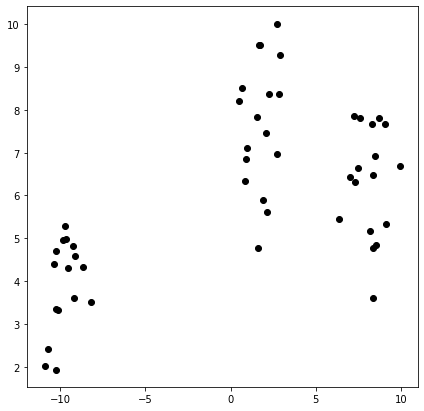

In [125]:
plot_data(X)

NOTE:
 + and Yellow Circle -> Initial Centroid
 * andBlack Circle -> Final Centroid


Initial Plot:



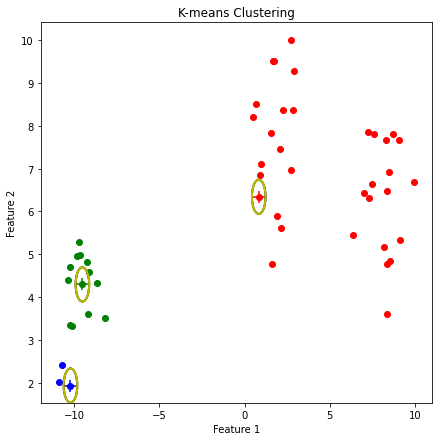


Initial Cluster Centers:

[array([0.82767806, 6.34128434]), array([-10.22111878,   1.93368758]), array([-9.52167804,  4.29489586])]

Final Cluster Centers:

[[  4.94071398   7.00104277]
 [-10.61896182   2.12402277]
 [ -9.54269796   4.31698518]]


Final Plot:



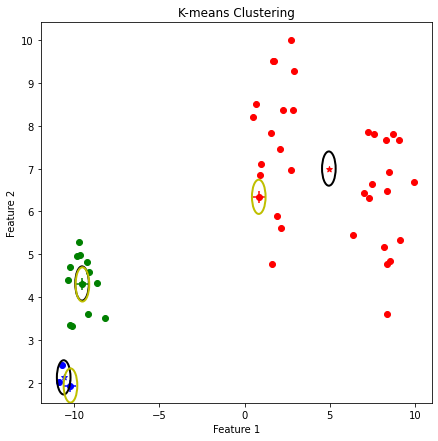

In [126]:
cluster,centroid = k_means(X,k,show_type='ini_fin')

In [127]:
from sklearn.cluster import KMeans
km = KMeans(
    n_clusters=3, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(X)

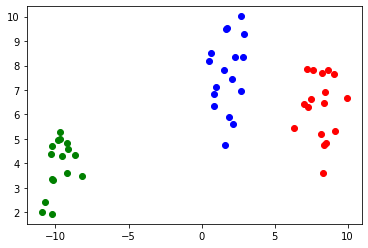

In [128]:
plt.scatter(X[y_km == 0, 0], X[y_km == 0, 1],c='blue')
plt.scatter(X[y_km == 1, 0], X[y_km == 1, 1],c='red')
plt.scatter(X[y_km == 2, 0], X[y_km == 2, 1],c='green')
plt.show()

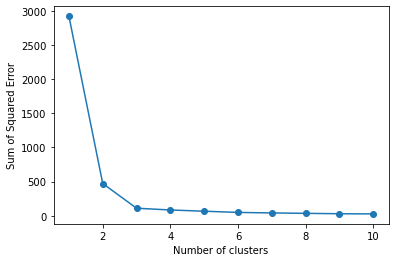

In [129]:
sse = []
k=range(1, 11)
for i in k:
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(X)
    sse.append(km.inertia_)
plt.plot(k, sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Squared Error')
plt.show()